In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv('weatherAUS.csv')

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df_copy=df.copy()

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [9]:
df.describe(include='object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


Data Type Conversion

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
#Extracting Year, Month and dat
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

Missing Value Handling

In [12]:
df.dropna(subset=['Evaporation','Sunshine','Cloud9am','Cloud3pm'], inplace=True) # drop missing values in these columns 

In [13]:
df.isnull().sum()

Date                0
Location            0
MinTemp            53
MaxTemp            42
Rainfall           76
Evaporation         0
Sunshine            0
WindGustDir      3958
WindGustSpeed    3941
WindDir9am       1857
WindDir3pm        336
WindSpeed9am      113
WindSpeed3pm       94
Humidity9am       152
Humidity3pm       100
Pressure9am        95
Pressure3pm        81
Cloud9am            0
Cloud3pm            0
Temp9am            76
Temp3pm            35
RainToday          76
RainTomorrow      209
Year                0
Month               0
Day                 0
dtype: int64

In [14]:
missingvalue_perc = df.isnull().sum() / len(df) * 100 
missingvalue_perc

Date             0.000000
Location         0.000000
MinTemp          0.084711
MaxTemp          0.067129
Rainfall         0.121472
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      6.326120
WindGustSpeed    6.298948
WindDir9am       2.968066
WindDir3pm       0.537033
WindSpeed9am     0.180609
WindSpeed3pm     0.150241
Humidity9am      0.242943
Humidity3pm      0.159831
Pressure9am      0.151840
Pressure3pm      0.129463
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.121472
Temp3pm          0.055941
RainToday        0.121472
RainTomorrow     0.334047
Year             0.000000
Month            0.000000
Day              0.000000
dtype: float64

In [15]:
 import missingno as msno

<Axes: >

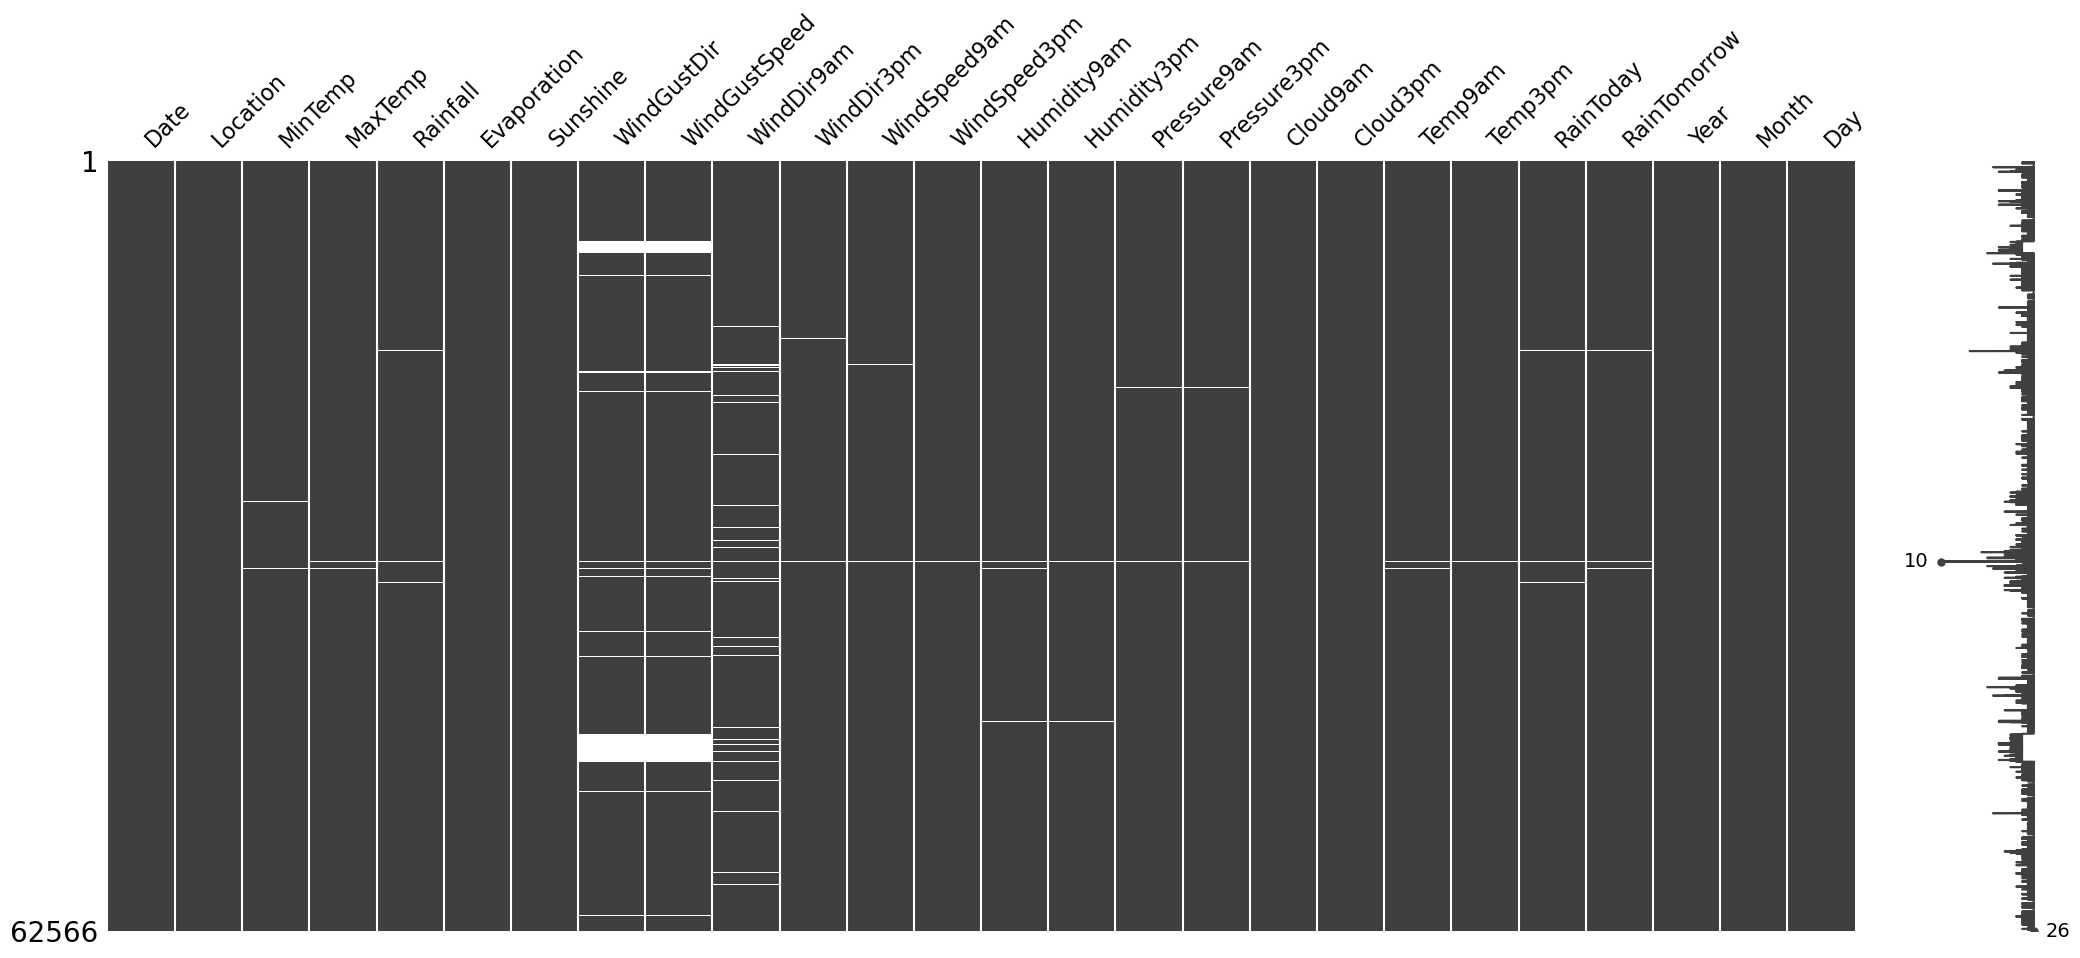

In [16]:
msno.matrix(df)

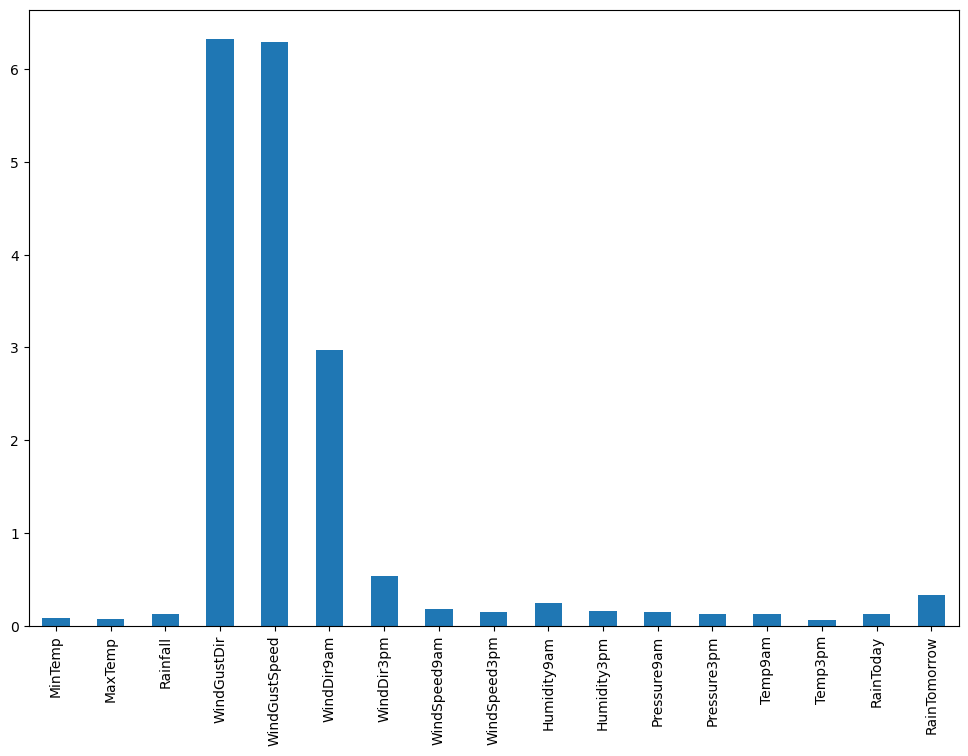

In [17]:
missingvalue_perc.loc[missingvalue_perc> 0].plot(kind='bar', figsize=(12,8))
plt.show()

In [18]:
# Sort the DataFrame by 'Location' and 'Date' to ensure data is ordered
df.sort_values(by=['Location', 'Date'], inplace=True)


In [19]:

df.dropna(subset=['WindGustSpeed'], inplace=True) # drop missing value

In [20]:
df.isnull().sum()


Date                0
Location            0
MinTemp            27
MaxTemp             6
Rainfall           62
Evaporation         0
Sunshine            0
WindGustDir        17
WindGustSpeed       0
WindDir9am       1576
WindDir3pm        201
WindSpeed9am       39
WindSpeed3pm       21
Humidity9am       141
Humidity3pm        84
Pressure9am        59
Pressure3pm        48
Cloud9am            0
Cloud3pm            0
Temp9am            69
Temp3pm            25
RainToday          62
RainTomorrow      156
Year                0
Month               0
Day                 0
dtype: int64

In [21]:
df.dropna(subset=['RainTomorrow','RainToday','Rainfall','Humidity9am','Humidity3pm'], inplace=True) # drop missing value

In [22]:
# Forward fill missing values in 'WindDir9am' column
df['WindDir9am'].fillna(method='ffill', inplace=True)


In [23]:
# Forward fill missing values in 'WindDir9am' column
df['WindDir3pm'].fillna(method='ffill', inplace=True)
df['WindDir3pm'].fillna(method='ffill', inplace=True)
df['WindSpeed9am'].fillna(method='ffill', inplace=True)
df['WindSpeed3pm'].fillna(method='ffill', inplace=True)
df['Pressure9am'].fillna(method='ffill', inplace=True)
df['Pressure3pm'].fillna(method='ffill', inplace=True)
df['WindGustDir'].fillna(method='ffill', inplace=True)


In [24]:
df['MinTemp'].fillna(method='bfill', inplace=True)
df['MaxTemp'].fillna(method='bfill', inplace=True)
df['WindGustDir'].fillna(method='bfill', inplace=True)

In [25]:
df.isnull().sum()

#df.groupby(Location)[WindGustDir].interpolate(method='linear')

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

<Axes: >

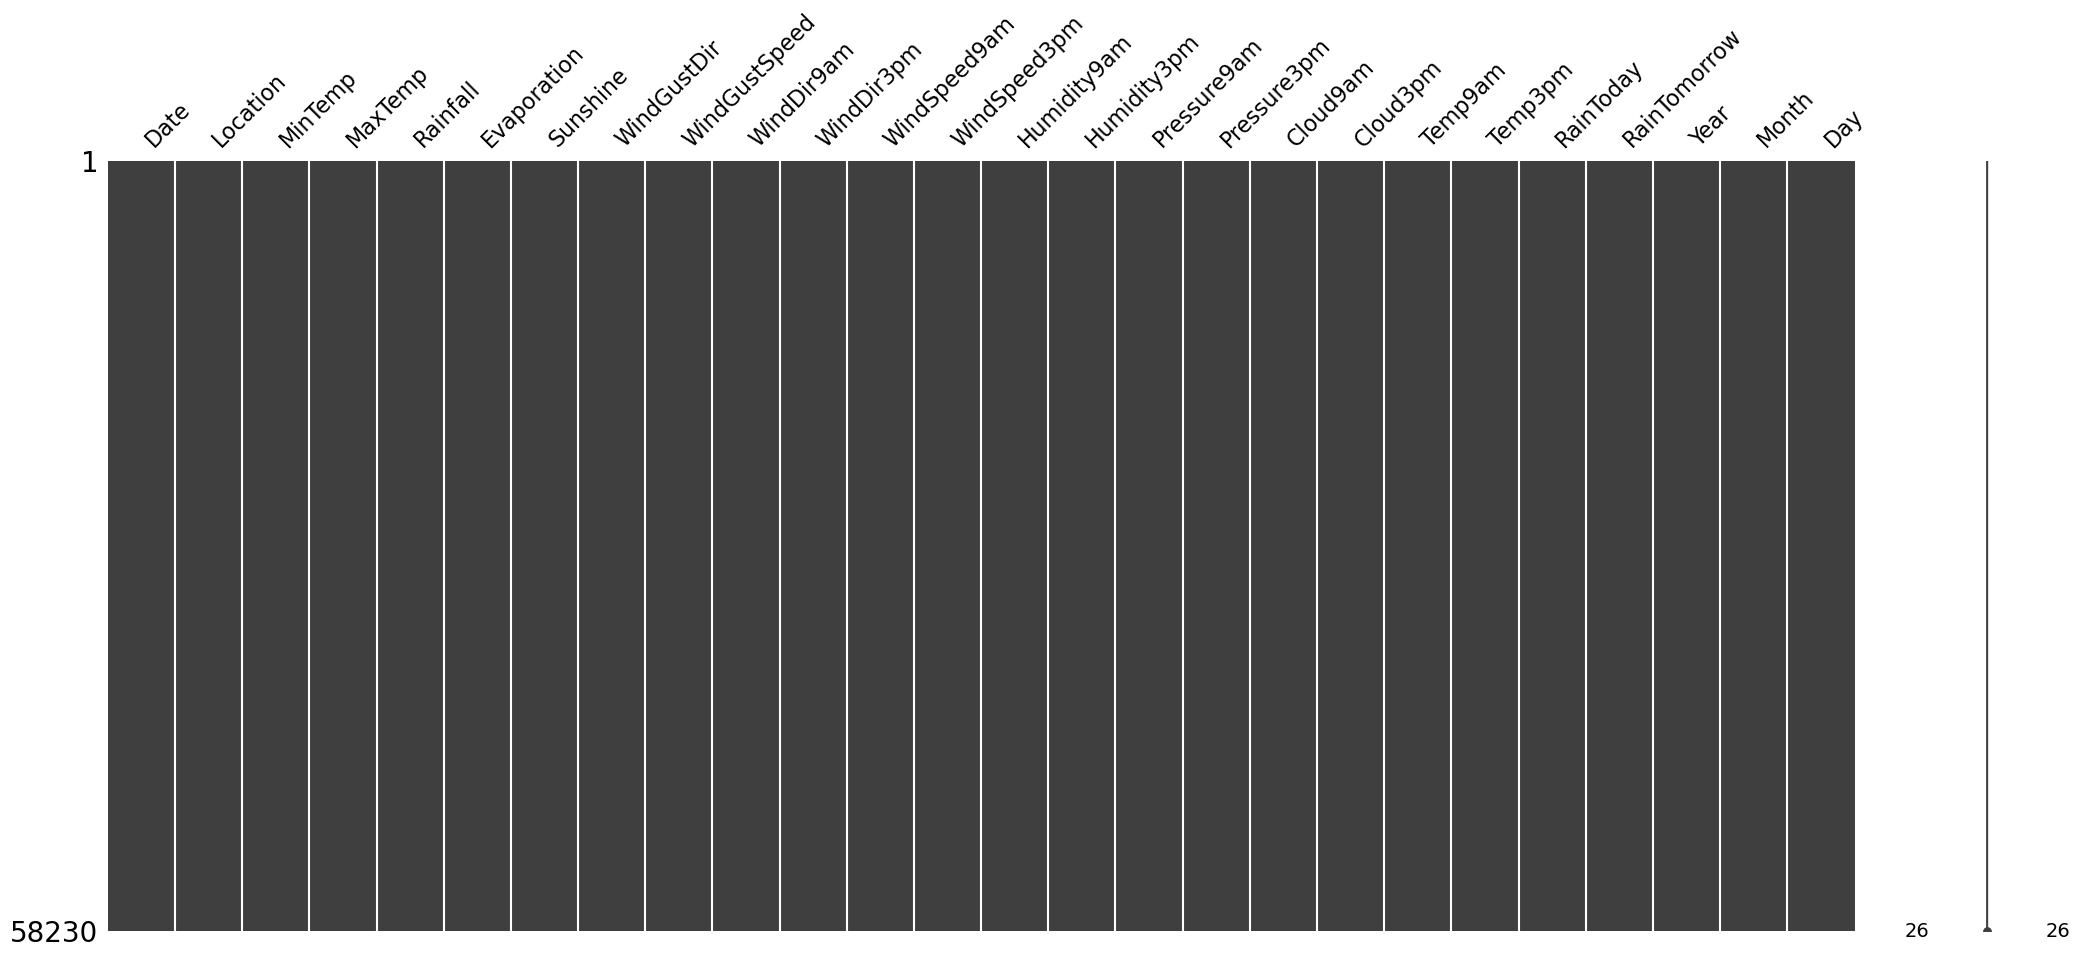

In [26]:
msno.matrix(df)

In [27]:
 #Calculate temperature change from morning to afternoon
df['TempChange'] = df['Temp3pm'] - df['Temp9am']

# Calculate humidity change from morning to afternoon
df['HumidityChange'] = df['Humidity3pm'] - df['Humidity9am']

# Calculate pressure change from morning to afternoon
df['PressureChange'] = df['Pressure3pm'] - df['Pressure9am']

In [28]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,TempChange,HumidityChange,PressureChange
136071,2008-12-01,AliceSprings,19.6,37.6,0.0,11.2,9.8,WNW,87.0,NNE,...,30.4,37.2,No,Yes,2008,12,1,6.8,-1.0,-4.7
136072,2008-12-02,AliceSprings,21.0,39.1,1.2,9.0,12.2,NNW,41.0,NNW,...,32.5,38.2,Yes,No,2008,12,2,5.7,-5.0,-4.7
136073,2008-12-03,AliceSprings,22.9,40.9,0.0,11.6,12.6,NNW,48.0,ENE,...,35.0,40.4,No,No,2008,12,3,5.4,-6.0,-2.9
136074,2008-12-04,AliceSprings,24.7,40.5,0.0,16.0,7.8,WNW,72.0,SSW,...,32.3,36.5,No,No,2008,12,4,4.2,-5.0,-1.8
136075,2008-12-05,AliceSprings,23.4,32.4,0.2,12.2,4.1,SSW,46.0,S,...,26.8,31.1,No,Yes,2008,12,5,4.3,-15.0,-3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108178,2016-05-29,Woomera,6.4,19.7,0.0,2.8,9.4,N,37.0,NE,...,11.3,19.0,No,No,2016,5,29,7.7,-47.0,-2.8
108346,2016-11-13,Woomera,12.0,22.9,0.0,12.8,0.0,WSW,83.0,SW,...,14.7,20.6,No,No,2016,11,13,5.9,-10.0,-0.5
108351,2016-11-18,Woomera,22.1,33.2,0.0,17.4,0.0,SE,43.0,SSE,...,23.6,32.1,No,No,2016,11,18,8.5,-19.0,-1.4
108352,2016-11-19,Woomera,17.9,35.8,0.0,14.8,0.0,SSE,41.0,SSE,...,21.2,33.8,No,No,2016,11,19,12.6,-33.0,-3.0


In [29]:
df.dtypes

Date              datetime64[ns]
Location                  object
MinTemp                  float64
MaxTemp                  float64
Rainfall                 float64
Evaporation              float64
Sunshine                 float64
WindGustDir               object
WindGustSpeed            float64
WindDir9am                object
WindDir3pm                object
WindSpeed9am             float64
WindSpeed3pm             float64
Humidity9am              float64
Humidity3pm              float64
Pressure9am              float64
Pressure3pm              float64
Cloud9am                 float64
Cloud3pm                 float64
Temp9am                  float64
Temp3pm                  float64
RainToday                 object
RainTomorrow              object
Year                       int32
Month                      int32
Day                        int32
TempChange               float64
HumidityChange           float64
PressureChange           float64
dtype: object

Identifying Outlier for Numerical Data

In [30]:
numerical_columns = df.select_dtypes(include=['number']).columns

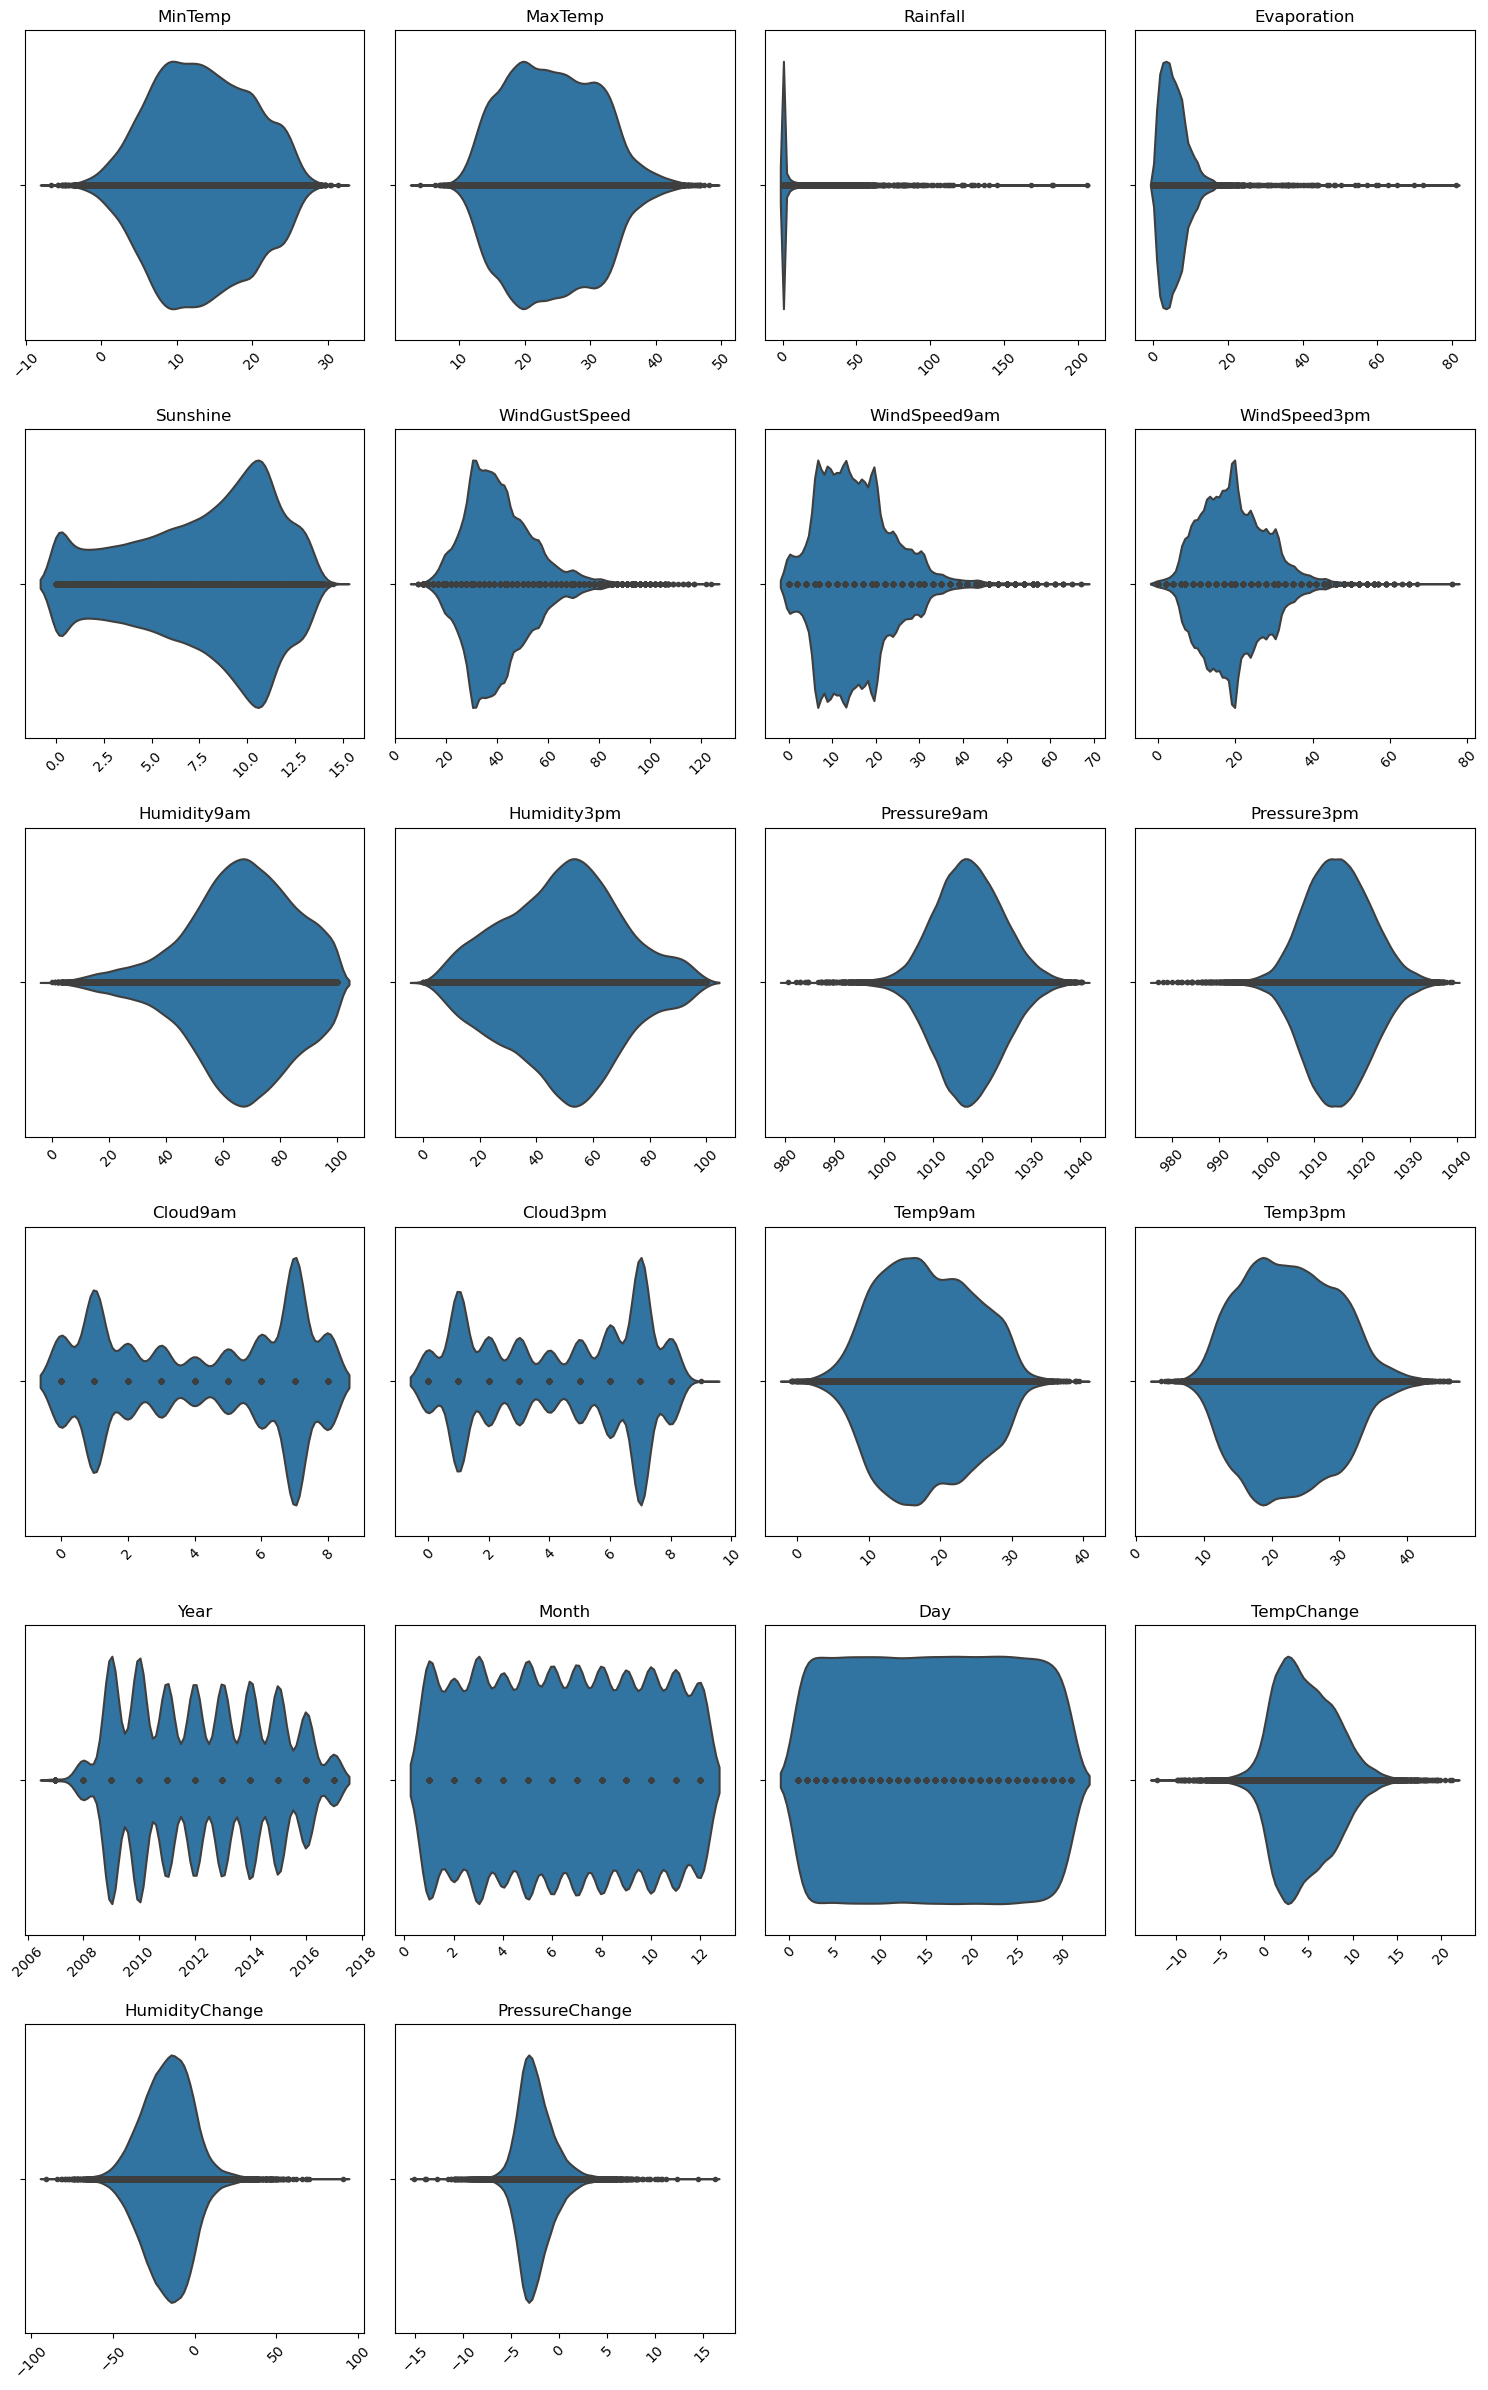

In [31]:
# Define the number of plots per row and per column
num_plots_per_row = 4
num_plots_per_col = 5
num_features = len(numerical_columns)

# Calculate the number of rows and columns needed
num_rows = (num_features - 1) // num_plots_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 4 * num_rows))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Plot each numerical feature as a violin plot
for i, col in enumerate(numerical_columns):
    sns.violinplot(x=df[col], ax=axes[i], inner="points")
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove empty subplots
for j in range(num_features, num_rows * num_plots_per_row):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

Removing Outlier using Z-Score

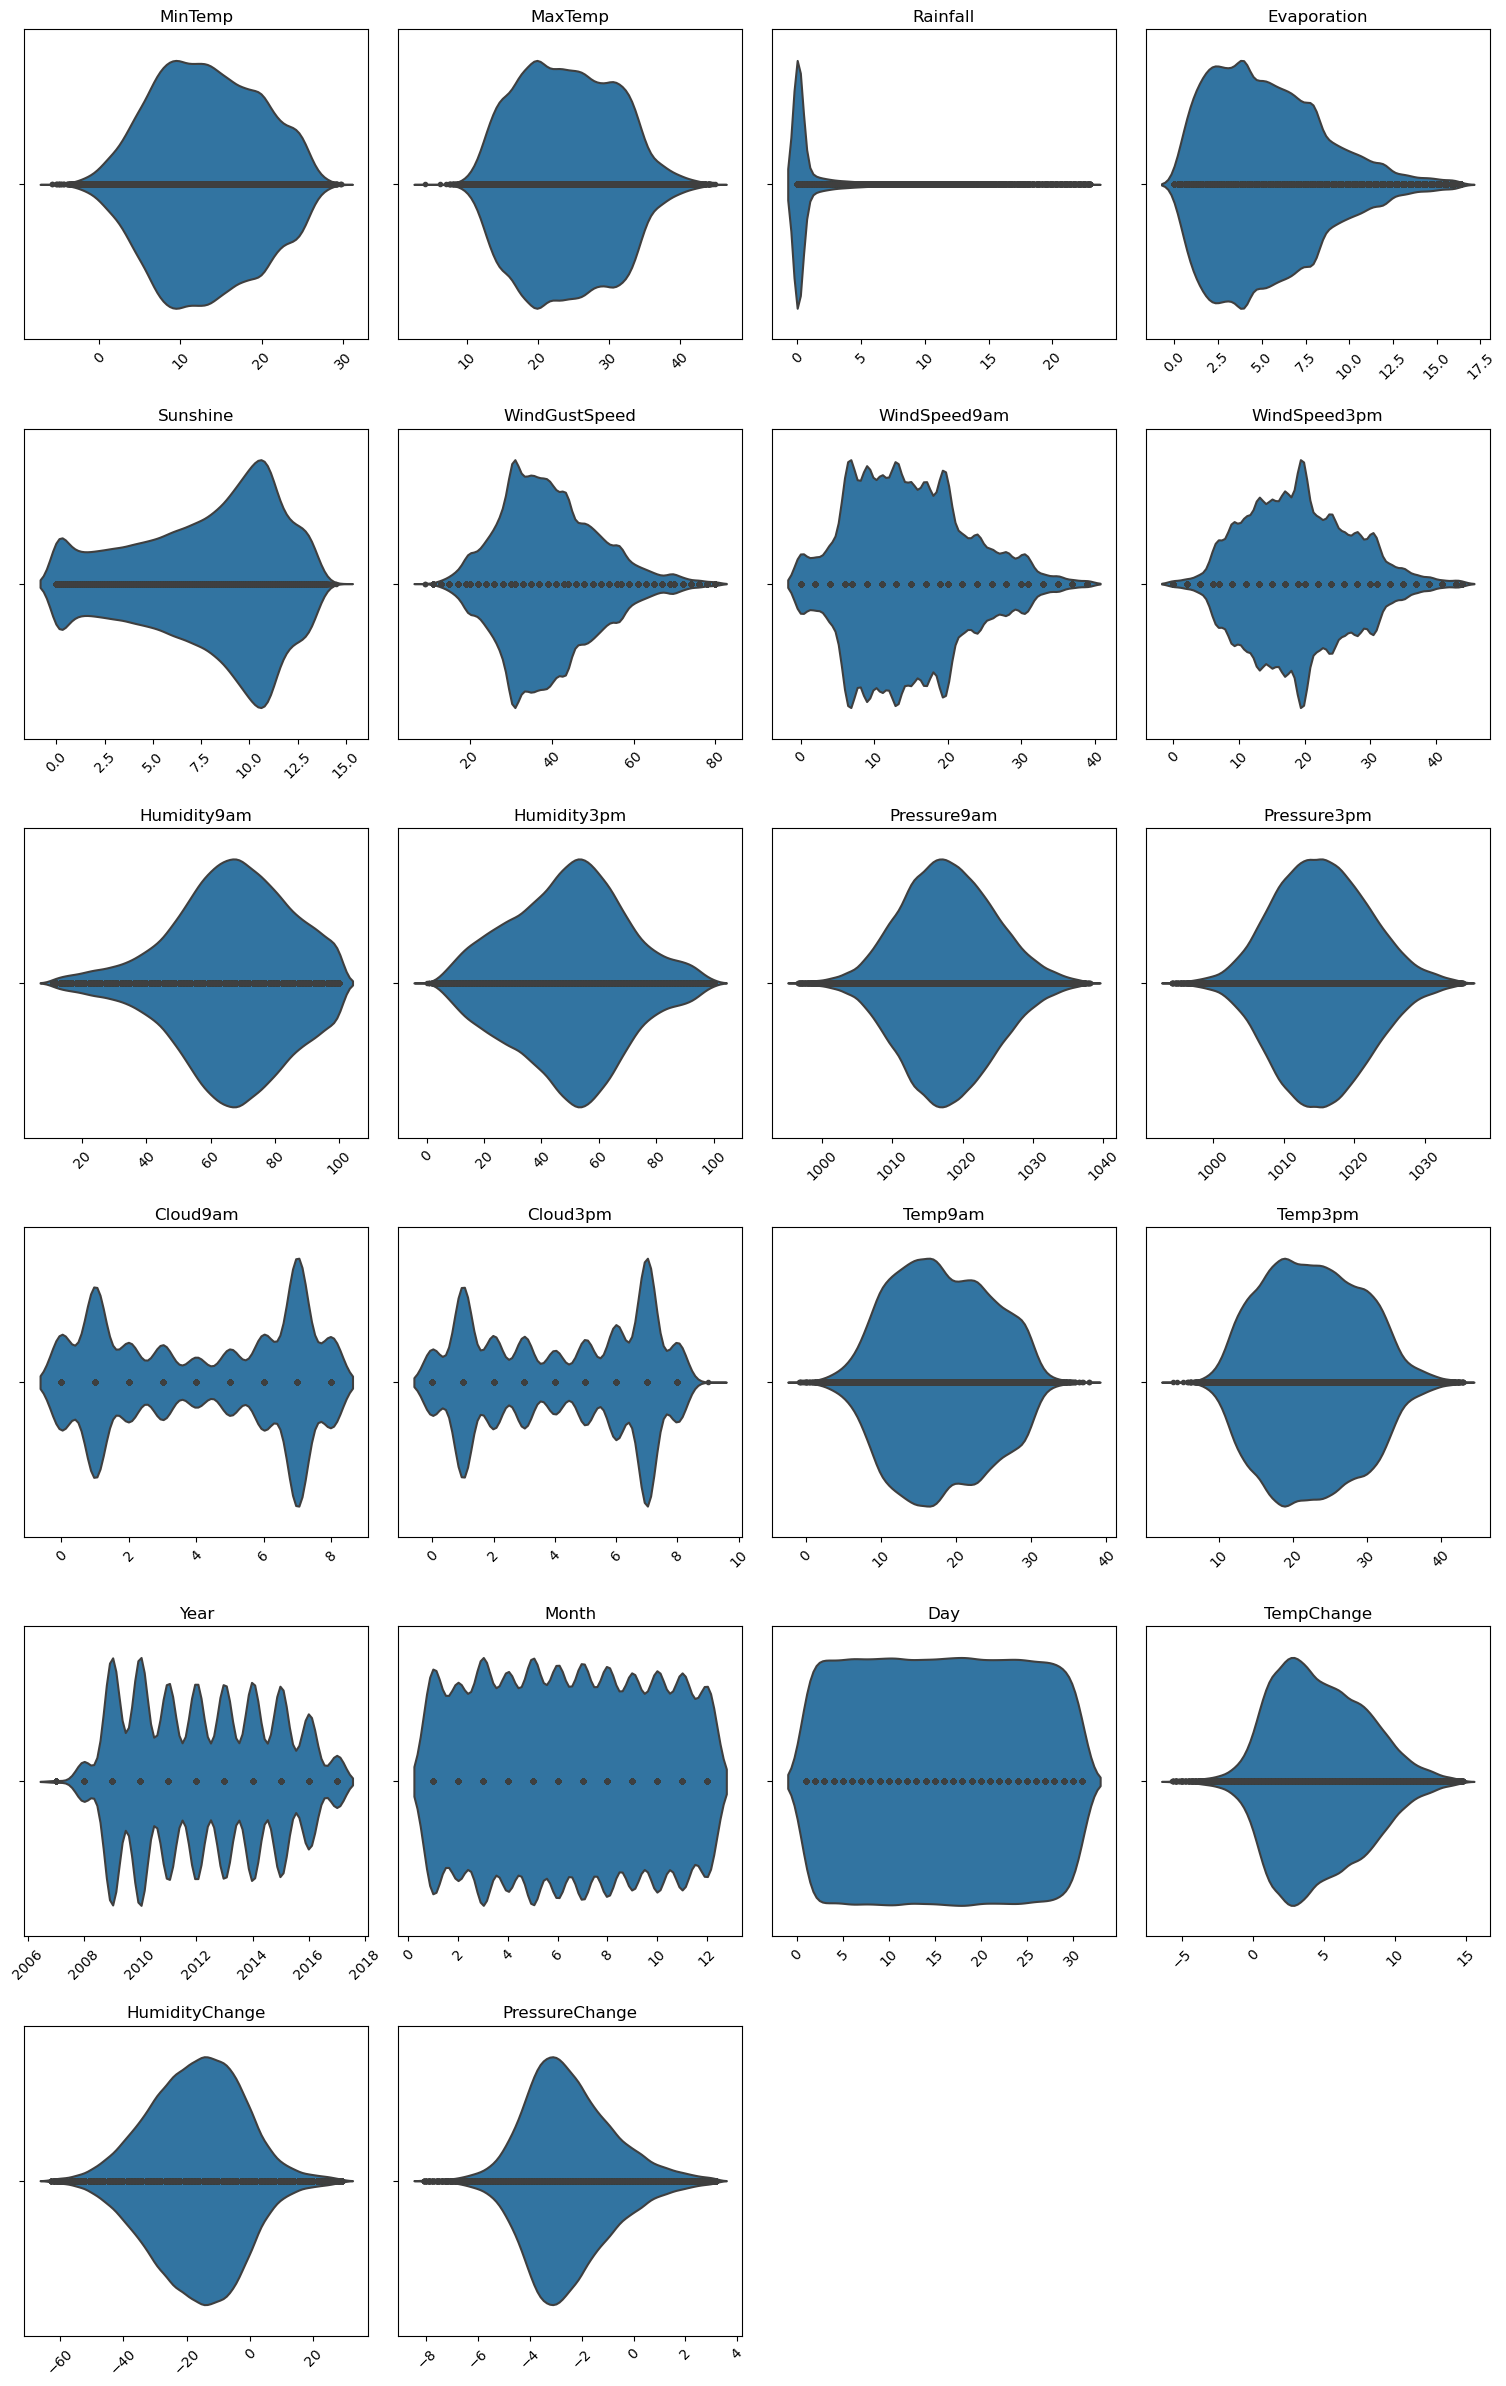

In [32]:
from scipy.stats import zscore
z_scores = zscore(df[numerical_columns])

# Set threshold for Z-score (e.g., 3)
z_threshold = 3

# Remove rows with outliers based on Z-score
df= df[(abs(z_scores) < z_threshold).all(axis=1)]

# Create subplots
fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 4 * num_rows))

# Flatten the axes array to easily iterate over subplots
axes = axes.flatten()

# Plot each numerical feature as a violin plot without outliers
for i, col in enumerate(numerical_columns):
    sns.violinplot(x=df[col], ax=axes[i], inner="points")
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove empty subplots
for j in range(num_features, num_rows * num_plots_per_row):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

One-Hot Incoding Label-Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

nominal_cols = ['Location', 'WindDir9am', 'WindDir3pm','WindGustDir']  #  nominal columns 
binary_cols = ['RainToday', 'RainTomorrow']  #  binary columns 


# One-hot encode nominal categorical data
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Map binary categorical data to 0 and 1
binary_map = {'No': 0, 'Yes': 1}
for col in binary_cols:
    df[col] = df[col].map(binary_map)



In [34]:
df.replace({True: 1, False: 0}, inplace=True)

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month',
       'Day', 'TempChange', 'HumidityChange', 'PressureChange',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin',
       'Location_Hobart', 'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_Mildura', 'Location_Moree', 'Location_MountGambier',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Sale',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',
       'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown',
       'Location_Woomera', 'WindDir9am_ENE', 'WindDir9am_ESE'

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
136072,2008-12-02,21.0,39.1,1.2,9.0,12.2,41.0,24.0,9.0,18.0,...,1,0,0,0,0,0,0,0,0,0
136073,2008-12-03,22.9,40.9,0.0,11.6,12.6,48.0,7.0,24.0,17.0,...,1,0,0,0,0,0,0,0,0,0
136074,2008-12-04,24.7,40.5,0.0,16.0,7.8,72.0,2.0,22.0,29.0,...,0,0,0,0,0,0,0,0,1,0
136075,2008-12-05,23.4,32.4,0.2,12.2,4.1,46.0,9.0,17.0,58.0,...,0,0,0,0,0,1,0,0,0,0
136076,2008-12-06,21.7,25.1,2.6,8.4,0.2,35.0,19.0,11.0,90.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108175,2016-05-26,11.1,18.0,4.0,2.0,5.5,37.0,11.0,19.0,91.0,...,0,0,0,0,0,0,0,0,0,1
108177,2016-05-28,6.6,17.4,0.3,3.9,7.7,33.0,15.0,17.0,83.0,...,0,0,0,0,0,0,0,0,0,1
108178,2016-05-29,6.4,19.7,0.0,2.8,9.4,37.0,13.0,20.0,79.0,...,0,0,0,0,0,0,0,0,0,0
108352,2016-11-19,17.9,35.8,0.0,14.8,0.0,41.0,20.0,17.0,52.0,...,0,0,0,0,1,0,0,0,0,0


Model Development

Model with default settings 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X = df.drop(columns=['RainToday', 'RainTomorrow', 'Date', 'Temp3pm', 'Temp9am', 'Humidity3pm', 'Humidity9am', 'Pressure3pm', 'Pressure9am'])
y = df[['RainToday', 'RainTomorrow']].values

In [38]:
# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#  Build the model with default settings
clf_default = DecisionTreeClassifier(random_state=42)
clf_default.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [40]:
# Evaluate the default model
y_pred_default = clf_default.predict(X_test)

In [41]:
accuracy_default = accuracy_score(y_test, y_pred_default)


In [42]:
print(f"Default Model Accuracy: {accuracy_default}*100")

Default Model Accuracy: 0.796737417740291*100


•	Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [45]:
clf = DecisionTreeClassifier()

In [46]:
grid_search = GridSearchCV(clf, param_grid, cv=5)

In [47]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [48]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [49]:
accuracy = best_estimator.score(X_test, y_test)

In [50]:
print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 0.8428955417554918


In [51]:
# Train a Decision Tree Classifier with Gini impurity
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

importances = clf.feature_importances_

# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = feature_importance_df.head(10)
print("Top Features based on Gini Importance:")
print(top_features['Feature'].tolist())

Top Features based on Gini Importance:
['Rainfall', 'Sunshine', 'HumidityChange', 'TempChange', 'PressureChange', 'WindGustSpeed', 'MinTemp', 'MaxTemp', 'Evaporation', 'Day']


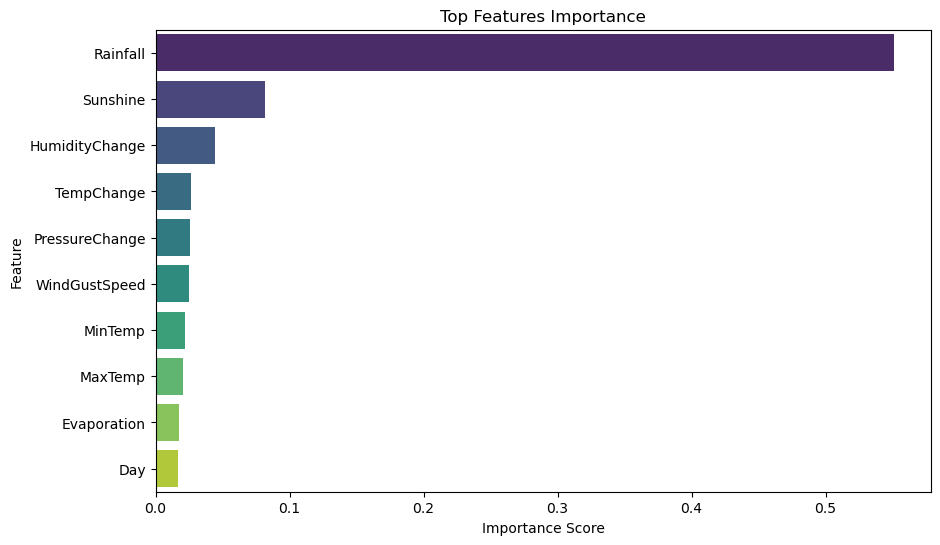

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top Features Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()